In [2]:
import assnake
import pandas as pd
import numpy as np
import seaborn as sns

from assnake_core_taxonomy.metaphlan2.loaders import filter_metaphlan2

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

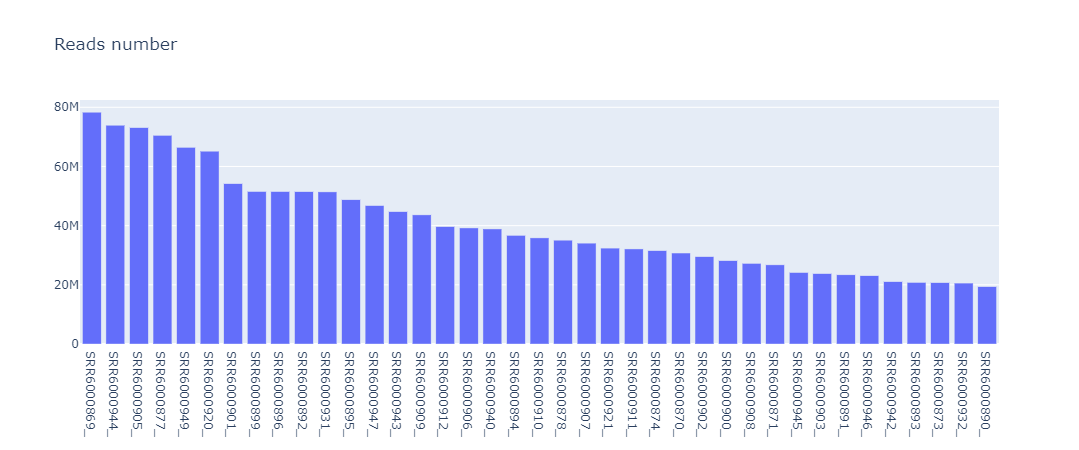

39


,preproc,df,fs_prefix,df_sample,reads
0,sra,Matson_2019,/data11/bio/mg_data/CANCER_EXTERNAL,SRR6000909,43629321
1,sra,Matson_2019,/data11/bio/mg_data/CANCER_EXTERNAL,SRR6000947,46826306
2,sra,Matson_2019,/data11/bio/mg_data/CANCER_EXTERNAL,SRR6000895,48744996


In [3]:
matson = assnake.Dataset('Matson_2019')
matson.plot_reads_loss(sort='sra')
df_samples = matson.sample_sets['sra']
print(len(df_samples))
df_samples.head(3)

In [4]:
sra_run = pd.read_csv('../METADATA/SraRunTable.txt')
sra_run = sra_run[['Run', 'Assay Type', 'Host', 'LibrarySelection', 'Sample Name', 'subject_id']]
sra_run.head(3)
# sra_run.loc[(sra_run['Assay Type'] == 'WGS') & (sra_run['Host'] == 'Homo sapiens')]

_meta = df_samples.merge(sra_run, left_on = 'df_sample', right_on = 'Run')
print(len(_meta))
_meta.sort_values('subject_id').head(3)

meta = pd.read_csv('../METADATA/human_16S.sampleinfo.csv')
print(len(meta))
meta.head(3)

meta = meta.merge(_meta, left_on = 'Sample', right_on = 'subject_id')
meta = meta.drop(['df', 'fs_prefix', 'Run'], axis = 1)
meta = meta.set_index('df_sample')
# meta.to_csv('../METADATA/meta_human_wgs.tsv', sep = '\t')


39
42


In [6]:
mp2 = matson.load_metaphlan2(preprocessing = 'sra')
mp2_filt = filter_metaphlan2(mp2, level = 's__', zeroes_in_samples=10)
# mp2_filt.to_csv('../DATA/mp2_human_wgs_mp2_species.tsv', sep = '\t')
mp2_filt = np.log(mp2_filt + 0.01)
mp2_filt.shape

(39, 396)

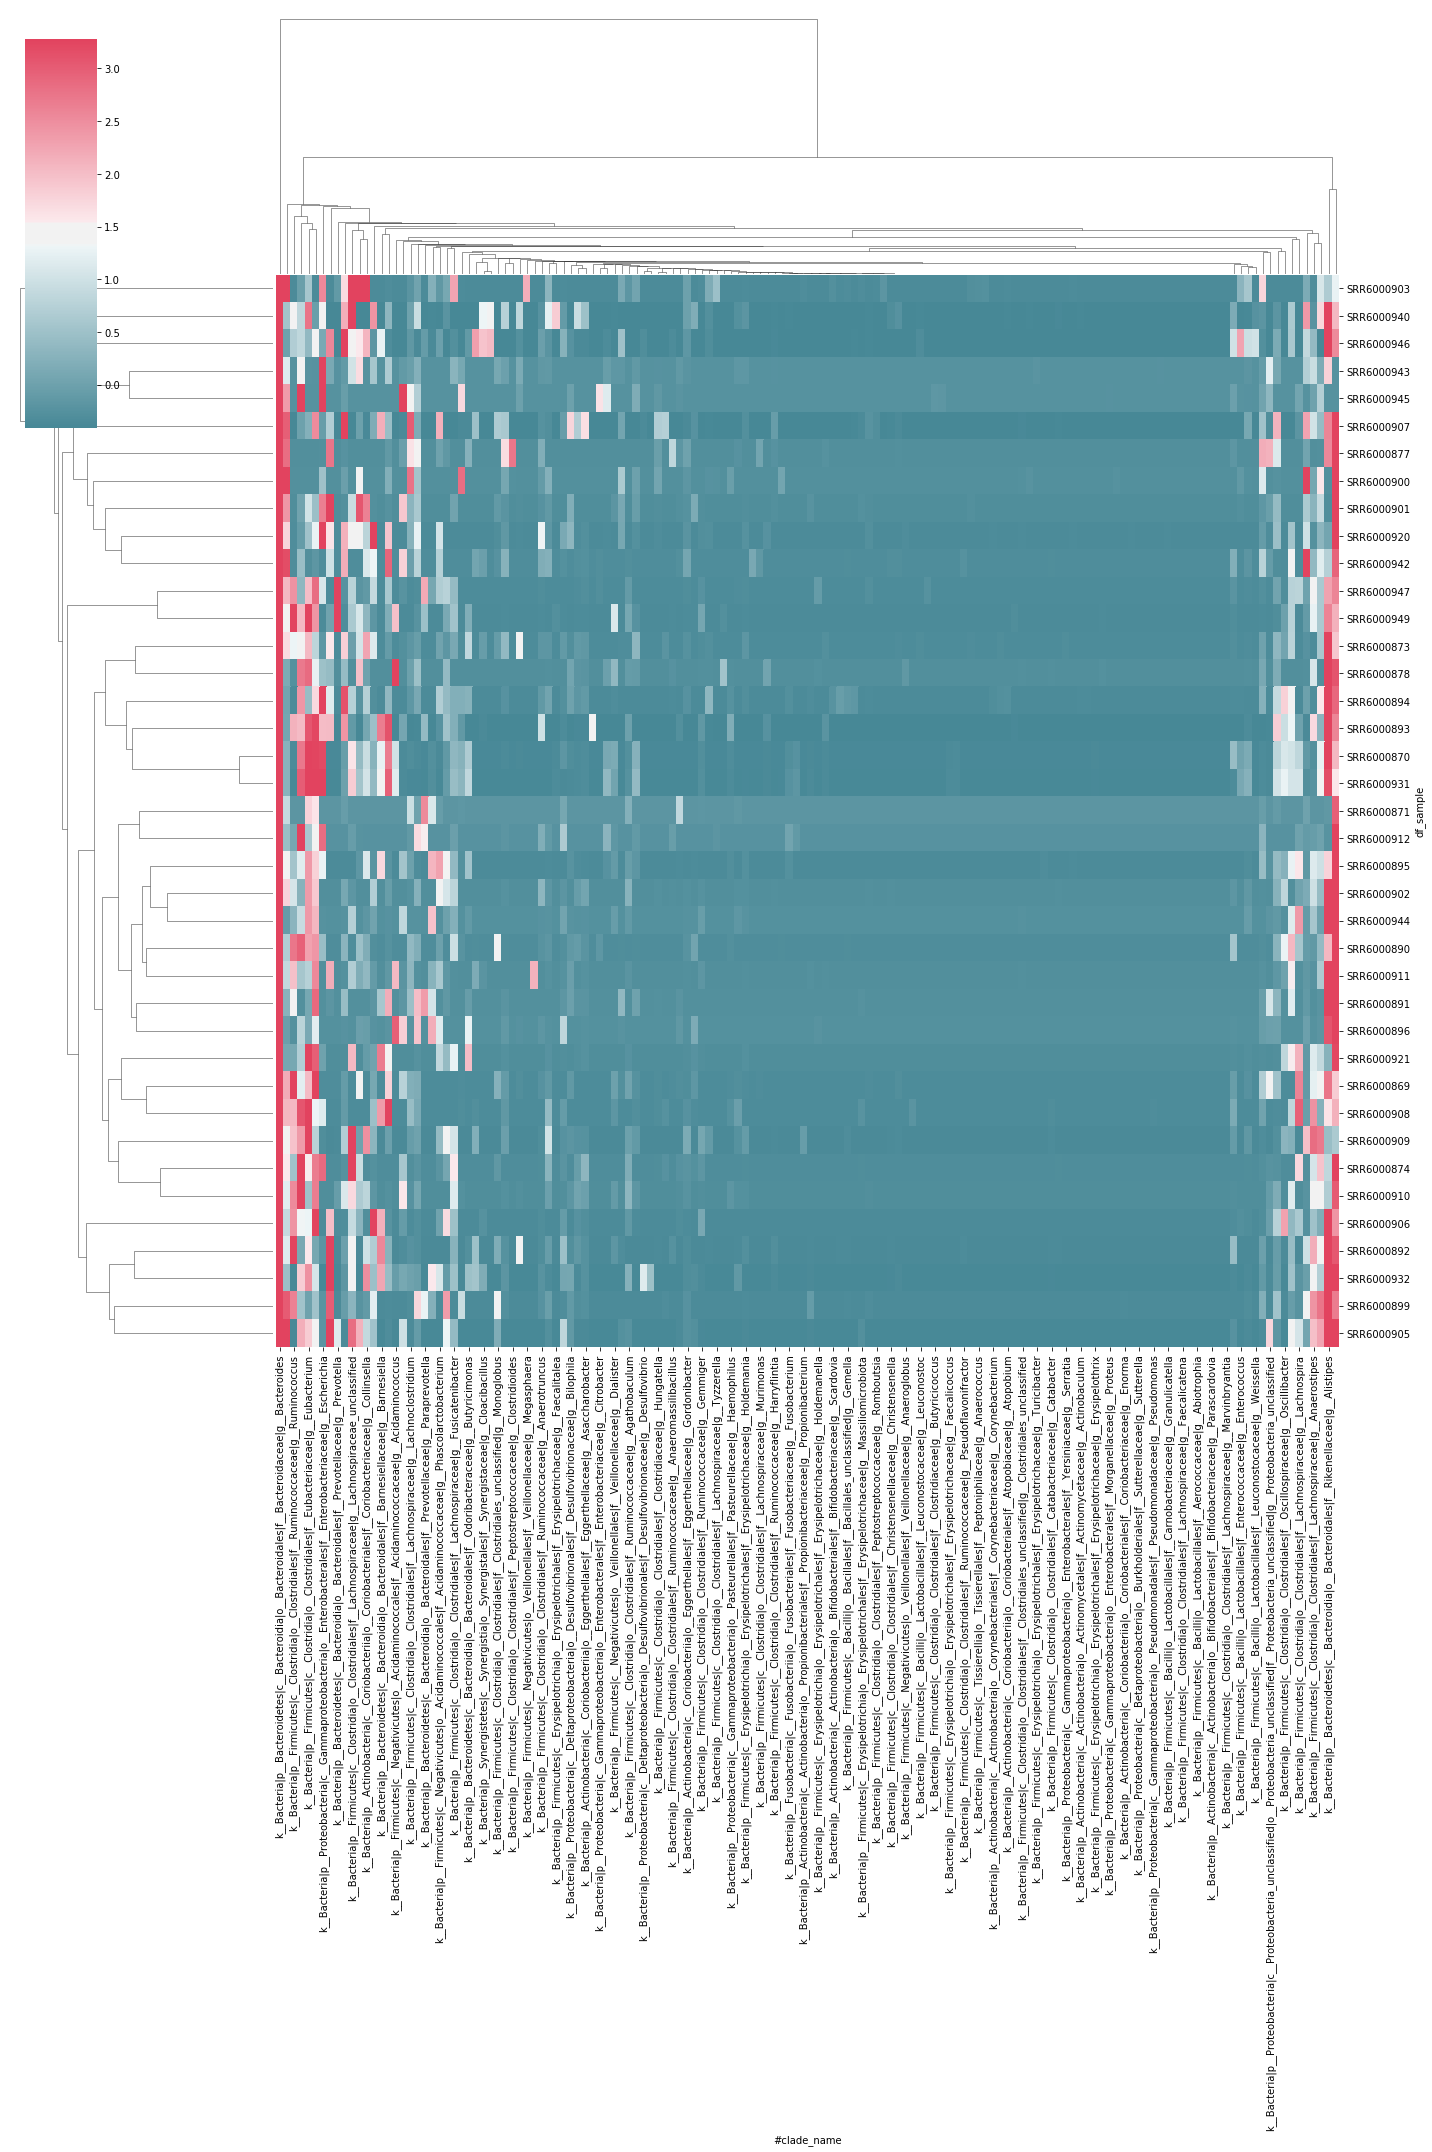

In [64]:
cmap = sns.diverging_palette(h_neg=213, h_pos=6, s=72, l=53, sep=15, n=9,as_cmap = True)
g = sns.clustermap(mp2_filt, figsize=(20,30), cmap=cmap, robust=True, z_score=0)